In [3]:
%matplotlib inline
from __future__ import print_function
from matplotlib import pyplot as plt
import collections
import os, struct
import numpy as np
import scipy as sp
import scipy.io
import random
import math
from random import randint
import string
import tensorflow as tf
import gzip
import zlib
import tarfile
import pandas as pd
from six.moves import range
from six.moves.urllib.request import urlretrieve
from array import array as pyarray 
from six.moves import cPickle as pickle
from scipy.misc import imresize
from IPython.display import Image, display, HTML
from os import listdir
import skimage
from skimage import data
from skimage import exposure
from skimage import img_as_ubyte
from skimage.transform import resize
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import novice

display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
def saveAsPickle(data,filename):
    try:
        with open(filename, 'wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
            print (filename + " pickled!")
    except Exception as e:
        print('Unable to save data to', filename, ':', e)
        
def loadPickle(file):
    with open(file, 'rb') as pickle_file:
        return pickle.load(pickle_file)

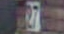

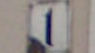

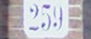

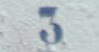

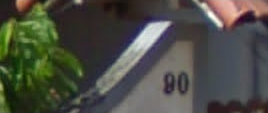

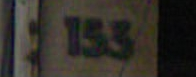

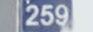

In [5]:
svhn_dest_folder = r'/home/ubuntu/svhn_extracted_tar_data'
imagesPathTrain = os.path.join(svhn_dest_folder,'train')
imagesNamesTrain = [f for f in os.listdir(imagesPathTrain) if f.endswith('.png')][:10]
for imageName in imagesNamesTrain:
    display(Image(filename=os.path.join(imagesPathTrain,imageName)))

In [12]:
import digitStructMatToCsv
def matToCsv(sourceMat, destCsv, force=False):
    if (os.path.isfile(destCsv)):
        print (sourceMat + " already converted to " + destCsv)
    else:
        csvFile = open(destCsv, 'wb')
        digitStructMatToCsv.writeToCsvFile(sourceMat, csvFile)
        csvFile.close()
        print (sourceMat + " converted to " + destCsv)

In [6]:
svhn_mat_to_csv_data = r'/home/ubuntu/svhn_mat_to_csv_data'

In [14]:
matToCsv(os.path.join(svhn_dest_folder,"test","digitStruct.mat"), os.path.join(svhn_mat_to_csv_data,"test","digitStruct.csv"))
matToCsv(os.path.join(svhn_dest_folder,"train","digitStruct.mat"), os.path.join(svhn_mat_to_csv_data,"train","digitStruct.csv"))
matToCsv(os.path.join(svhn_dest_folder,"extra","digitStruct.mat"), os.path.join(svhn_mat_to_csv_data,"extra","digitStruct.csv"))

Number of image files: 13068
/home/ubuntu/svhn_extracted_tar_data/test/digitStruct.mat converted to /home/ubuntu/svhn_mat_to_csv_data/test/digitStruct.csv


In [7]:
svhn_train_digit_csv_df = pd.read_csv(os.path.join(svhn_mat_to_csv_data,"train","digitStruct.csv"))
svhn_test_digit_csv_df = pd.read_csv(os.path.join(svhn_mat_to_csv_data,"test","digitStruct.csv"))
svhn_extra_digit_csv_df = pd.read_csv(os.path.join(svhn_mat_to_csv_data,"extra","digitStruct.csv"))

In [18]:
def create_svhn_metadata(image_folder,dataframe):
    df = pd.DataFrame(columns=('filename', 'value', 'digits', 'length', 'width', 'height','box'))
    current_image_file = ""
    digits = []
    left = top = 999999
    right = bottom = 0
    for i,row in dataframe.iterrows():
        
        if current_image_file != row['FileName']:
            if len(digits) > 0:
                img = novice.open(os.path.join(image_folder,current_image_file))
                df.loc[len(df)] = [current_image_file ,int("".join(str(x) for x in digits)), digits, len(digits), img.width, img.height,[left,top,right,bottom]]
            current_image_file = row['FileName']
            digits = []
            left = top = 999999
            right = bottom = 0
            
        # Since 0 are encoded as 10 in the mat and csv. we substite 10 with 0    
        digit = 0 if row['DigitLabel'] == 10 else row['DigitLabel']
        # The street number surrounding crop box
        left = min(row['Left'],left)
        top = min(row['Top'],top)
        right = max(row['Left'] + row['Width'],right)
        bottom = max(row['Top'] + row['Height'],bottom)
        digits.append(digit)

    return df

In [ ]:
svhn_train_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"train"),svhn_train_digit_csv_df)
svhn_test_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"test"),svhn_test_digit_csv_df)
svhn_extra_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"extra"),svhn_extra_digit_csv_df)

In [25]:
saveAsPickle(svhn_test_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_test.dataframe"))
saveAsPickle(svhn_train_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_train.dataframe"))
saveAsPickle(svhn_extra_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_extra.dataframe"))

/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_test.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_train.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_extra.dataframe pickled!


In [8]:
svhn_train_df = loadPickle(os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_train.dataframe"))
svhn_test_df = loadPickle(os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_test.dataframe"))
svhn_extra_df = loadPickle(os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_extra.dataframe"))

filename           5610.png
value                    14
digits               [1, 4]
length                    2
width                    94
height                   39
box         [33, 3, 60, 35]
Name: 5609, dtype: object


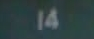

filename             12766.png
value                      115
digits               [1, 1, 5]
length                       3
width                      213
height                      70
box         [126, 20, 156, 46]
Name: 12765, dtype: object


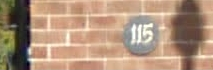

filename            4998.png
value                     26
digits                [2, 6]
length                     2
width                     95
height                    40
box         [39, 11, 59, 27]
Name: 4997, dtype: object


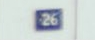

filename           7423.png
value                   124
digits            [1, 2, 4]
length                    3
width                   113
height                   53
box         [46, 6, 71, 43]
Name: 7422, dtype: object


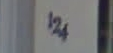

filename            8248.png
value                     36
digits                [3, 6]
length                     2
width                    183
height                    71
box         [88, 8, 122, 34]
Name: 8247, dtype: object


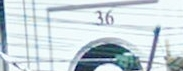

In [9]:
for x in range(5):
    tmp_loc = randint(0,len(svhn_test_df))
    print(svhn_test_df.iloc[tmp_loc])
    display(Image(os.path.join(svhn_dest_folder,"test",svhn_test_df.iloc[tmp_loc].filename)))

In [10]:
svhn_train_df = svhn_train_df[svhn_train_df.value != 0].reset_index(drop=True)
svhn_test_df = svhn_test_df[svhn_test_df.value != 0].reset_index(drop=True)
svhn_extra_df = svhn_extra_df[svhn_extra_df.value != 0].reset_index(drop=True)

In [11]:
saveAsPickle(svhn_train_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_train.dataframe"))
saveAsPickle(svhn_test_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_test.dataframe"))
saveAsPickle(svhn_extra_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_extra.dataframe"))

/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_train.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_test.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_extra.dataframe pickled!


In [14]:
print('Train data with length > 6 :'+str(svhn_train_df[svhn_train_df.length>5].shape[0]))
print('Test data with length > 6 :'+str(svhn_test_df[svhn_test_df.length>5].shape[0]))
print('Extra data with length > 6 :'+str(svhn_extra_df[svhn_extra_df.length>5].shape[0]))

Train data with length > 6 :1
Test data with length > 6 :0
Extra data with length > 6 :0


In [15]:
print('Train length: '+str(svhn_train_df.shape[0]))
print('Test length: '+str(svhn_test_df.shape[0]))
print('Extra length: '+str(svhn_extra_df.shape[0]))

Train length: 33345
Test length: 13054
Extra length: 202053


In [16]:
svhn_train_upto_five_length_df = svhn_train_df[svhn_train_df.length <= 5].reset_index(drop=True)
svhn_test_upto_five_length_df = svhn_test_df[svhn_test_df.length <= 5].reset_index(drop=True)
svhn_extra_upto_five_length_df = svhn_extra_df[svhn_extra_df.length <= 5].reset_index(drop=True)

saveAsPickle(svhn_train_upto_five_length_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_train_upto_five_length.dataframe"))
saveAsPickle(svhn_test_upto_five_length_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_test_upto_five_length.dataframe"))
saveAsPickle(svhn_extra_upto_five_length_df, os.path.join("/home/ubuntu/svhn_dataframe_pickle_data","digitStruct_extra_upto_five_length.dataframe"))

/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_train_upto_five_length.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_test_upto_five_length.dataframe pickled!
/home/ubuntu/svhn_dataframe_pickle_data/digitStruct_extra_upto_five_length.dataframe pickled!


In [17]:
print('Train length: '+str(svhn_train_upto_five_length_df.shape[0]))
print('Test length: '+str(svhn_test_upto_five_length_df.shape[0]))
print('Extra length: '+str(svhn_extra_upto_five_length_df.shape[0]))

Train length: 33344
Test length: 13054
Extra length: 202053


In [25]:
lengths[0]

2

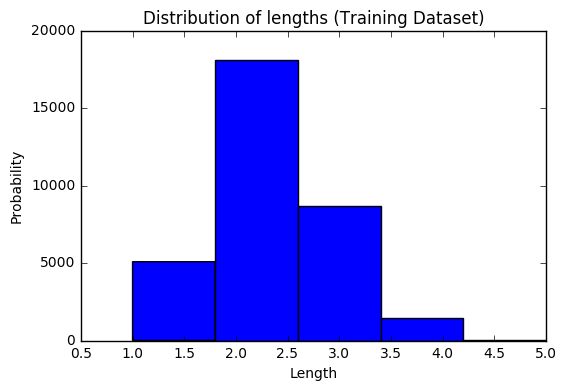

In [27]:
lengths = svhn_train_upto_five_length_df['length'].tolist()
lengths = map(int, lengths)
bins = int(max(lengths))
n, bins, patches = plt.hist(lengths, 5)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title(r'Distribution of lengths (Training Dataset)')
#plt.subplots_adjust(left=0.15)
plt.show()

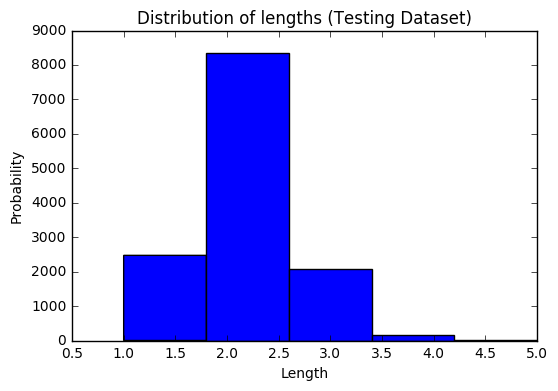

In [28]:
lengths = svhn_test_upto_five_length_df['length'].tolist()
lengths = map(int, lengths)
bins = int(max(lengths))
n, bins, patches = plt.hist(lengths, 5)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title(r'Distribution of lengths (Testing Dataset)')
#plt.subplots_adjust(left=0.15)
plt.show()

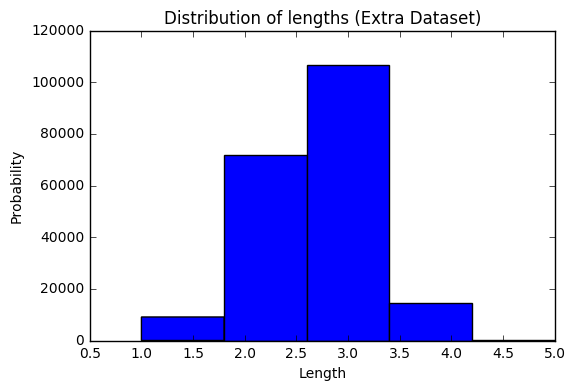

In [29]:
lengths = svhn_extra_upto_five_length_df['length'].tolist()
lengths = map(int, lengths)
bins = int(max(lengths))
n, bins, patches = plt.hist(lengths, 5)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title(r'Distribution of lengths (Extra Dataset)')
#plt.subplots_adjust(left=0.15)
plt.show()